In [1]:
import xarray as xr
import sys
import matplotlib.pyplot as plt
import os
import tqdm
from tqdm import tqdm
import xskillscore as xs
import tqdm
import tensorflow as tf
import numpy as np
#DisableqdGPU
#os.environ["CUDA_VISIBLE_DEVICES"] = "1"
from comet_ml import Experiment
import numpy as np
import tensorflow as tf
import albumentations as A
from functools import partial
AUTOTUNE = tf.data.experimental.AUTOTUNE
from dask.diagnostics import ProgressBar
#RMSE2 = abs(concat_dsets2 - concat_dsets2.sel(model ='Ground Truth')).mean(["lat","lon"])
import cartopy.crs as ccrs
import pandas as pd
# Create an experiment with your api key
sys.path.append(r'/nesi/project/niwa00018/ML_downscaling_CCAM/training_GAN')
from src_unet_init_step import *
from paper_experiments.analyse_experiments_src import *
from paper_experiments.post_process_funcs import *
from tensorflow.keras import layers
import pandas as pd
import json
# changed activation function to hyperbolic tangent



import tensorflow as tf
model_dir ='/nesi/project/niwa00018/ML_downscaling_CCAM/training_GAN/paper_experiments/models/'
filepath = '/nesi/project/niwa00018/ML_downscaling_CCAM/training_GAN/ancil_fields/ERA5_eval_ccam_12km.198110_NZ_Invariant.nc'
models = 'NorESM2-MM'
means_filepath = "/nesi/project/niwa00018/ML_downscaling_CCAM/Training_CNN/inputs/ERA5/mean_1974_2011.nc"
stds_filepath = "/nesi/project/niwa00018/ML_downscaling_CCAM/Training_CNN/inputs/ERA5/std_1974_2011.nc"
variables = ['q_500', 'q_850', 'u_500', 'u_850', 'v_500', 'v_850', 't_500', 't_850']
frameworks ='perfect'
base_dirs = r'/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/intermediate_outputs/val_netcdfs'


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
2024-08-05 10:02:42.243550: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


## Running a Script at the moment

This compares the average intensity constraint and running the results with the exact same loss function (not ensemble mean)
but a completely different architecture

This will tell us whether the results affect dispersion also

Complete the plot for CRPS with this result also. 

In [2]:
gcm = models

In [3]:
df = xr.open_dataset(f'{base_dirs}/{gcm}_Intensity_Penalty_hist_1986_2005_cascaded_Intensity_Constrained_applied_val_metrics.nc')
gt = xr.open_dataset(f'{base_dirs}/{gcm}_2001_2014_gt_val_metrics.nc')
df2 = xr.open_dataset(f'{base_dirs}/{gcm}_Intensity_Penalty_hist_1986_2005_cascaded_No_Constraint_applied_val_metrics.nc')

df5 = xr.open_dataset(f'{base_dirs}/{gcm}_Intensity_Penalty_hist_1986_2005_cascaded_Intensity_Con_Average_No_Ensemble_Mean_applied_val_metrics.nc')

df3 = xr.open_dataset(f'{base_dirs}/{gcm}_Intensity_Penalty_hist_1986_2005_cascaded_EC-Earth3_applied_val_metrics.nc')
df4 = xr.open_dataset(f'{base_dirs}/{gcm}_Intensity_Penalty_hist_1986_2005_cascaded_Intensity_Con_Average_applied_val_metrics.nc')


In [44]:
df5

<xarray.Dataset>
Dimensions:       (lat: 165, experiment: 4, year: 14, lon: 158, member: 10)
Coordinates:
  * lat           (lat) float64 -51.21 -51.11 -51.0 ... -33.83 -33.72 -33.61
  * experiment    (experiment) float64 0.0 0.005 0.01 0.1
    GCM           <U10 'ACCESS-CM2'
  * year          (year) int64 2001 2002 2003 2004 2005 ... 2011 2012 2013 2014
  * lon           (lon) float64 165.1 165.2 165.3 165.4 ... 181.7 181.8 181.9
Dimensions without coordinates: member
Data variables:
    cdd           (experiment, member, year, lat, lon) int64 11 11 11 ... 12 13
    rx1day        (year, experiment, member, lat, lon) float32 16.15 ... 72.1
    DJF_rainfall  (experiment, member, lat, lon) float32 2.2 2.184 ... 2.552
    JJA_rainfall  (experiment, member, lat, lon) float32 2.045 2.06 ... 4.526
    r10day        (year, experiment, member, lat, lon) int64 4 4 6 ... 27 30 32

In [4]:
gt = xr.open_dataset(f'{base_dirs}/{gcm}_2001_2014_gt_val_metrics.nc')

In [5]:
MAE_ic = abs(df.mean(["member",'year']) - gt.isel(experiment =0).mean('year')).mean(["lat","lon"])
MAE_lr = abs(df2.mean(["member",'year']) - gt.isel(experiment =0).mean('year')).mean(["lat","lon"])
MAE_ic_N = abs(df3.where(df3<5000,np.nan).mean(["member",'year']) - gt.isel(experiment =0).mean('year')).mean(["lat","lon"])
MAE_lr_N = abs(df4.mean(["member",'year']) - gt.isel(experiment =0).mean('year')).mean(["lat","lon"])
# same loss function as the other experiments
MAE_lr_N = abs(df5.mean(["member",'year']) - gt.isel(experiment =0).mean('year')).mean(["lat","lon"])

In [ ]:
## Experiments that were previously conducted

In [6]:
df_ic = xr.open_dataset(r'/nesi/project/niwa00018/ML_downscaling_CCAM/training_GAN/paper_experiments/outputs/validation_netcdfs/Intensity_Penalty/NorESM2-MM_Intensity_Penalty_hist_1986_2005_cascaded_perfect_applied_val_metrics.nc')
df_ic_nobn = xr.open_dataset(r'/nesi/project/niwa00018/ML_downscaling_CCAM/training_GAN/paper_experiments/outputs/validation_netcdfs/Intensity_Penalty_nobn/NorESM2-MM_Intensity_Penalty_nobn_hist_1986_2005_cascaded_perfect_applied_val_metrics.nc')
ground_truth = xr.open_dataset(r'/nesi/project/niwa00018/ML_downscaling_CCAM/training_GAN/paper_experiments/outputs/validation_netcdfs/Tanh_Activation/NorESM2-MM_hist_1986_2005_ground_truth_applied_val_metrics.nc')
df_noic = xr.open_dataset(r'/nesi/project/niwa00018/ML_downscaling_CCAM/training_GAN/paper_experiments/outputs/validation_netcdfs/LeakyRelu_Activation/NorESM2-MM_LeakyRelu_Activation_hist_1986_2005_cascaded_perfect_applied_val_metrics.nc')
tanh = xr.open_dataset(r'/nesi/project/niwa00018/ML_downscaling_CCAM/training_GAN/paper_experiments/outputs/validation_netcdfs/Tanh_Activation/NorESM2-MM_hist_1986_2005_cascaded_perfect_applied_val_metrics.nc')


In [30]:
tanh

<xarray.Dataset>
Dimensions:       (lat: 172, experiment: 7, year: 20, lon: 179)
Coordinates:
  * lat           (lat) float64 -51.21 -51.11 -51.0 ... -33.07 -32.97 -32.86
  * experiment    (experiment) float64 0.0 0.0001 0.00125 0.0025 0.005 0.01 0.1
  * year          (year) int64 1986 1987 1988 1989 1990 ... 2002 2003 2004 2005
  * lon           (lon) float64 164.9 165.0 165.1 165.2 ... 183.7 183.9 184.0
Data variables:
    cdd           (experiment, year, lat, lon) int64 8 8 8 8 7 ... 13 22 22 28
    rx1day        (year, experiment, lat, lon) float32 15.58 14.13 ... 88.92
    DJF_rainfall  (experiment, lat, lon) float32 2.165 2.266 ... 3.453 3.043
    JJA_rainfall  (experiment, lat, lon) float32 2.138 2.17 ... 3.819 3.249
    r10day        (year, experiment, lat, lon) int64 6 7 10 13 ... 26 26 21 15

In [7]:
MAE_icv2 = abs(df_ic.mean(["member",'year']) - ground_truth.mean('year')).mean(["lat","lon"])
MAE_lc_nobn = abs(df_ic_nobn.mean(["member",'year']) - ground_truth.mean('year')).mean(["lat","lon"])
MAE_noic_v2 = abs(df_noic.where(df_noic<5000,np.nan).mean(["member",'year']) - ground_truth.mean('year')).mean(["lat","lon"])
MAE_tanh = abs(tanh .where(tanh <5000,np.nan).mean(['year']) - ground_truth.mean('year')).mean(["lat","lon"])
#MAE_lr_N = abs(df4.mean(["member",'year']) - ground_truth .isel(experiment =0).mean('year')).mean(["lat","lon"])

In [43]:
MAE_tanh

<xarray.Dataset>
Dimensions:       (experiment: 7)
Coordinates:
  * experiment    (experiment) float64 0.0 0.0001 0.00125 0.0025 0.005 0.01 0.1
Data variables:
    cdd           (experiment) float64 3.495 3.142 2.477 2.098 1.947 2.13 4.427
    rx1day        (experiment) float32 23.87 22.69 13.39 9.014 9.043 8.348 38.86
    DJF_rainfall  (experiment) float32 0.8769 0.7891 0.5637 ... 0.2827 0.3307
    JJA_rainfall  (experiment) float32 1.431 1.394 1.144 ... 0.8342 0.679 0.4849
    r10day        (experiment) float64 12.94 11.86 9.153 7.069 5.529 4.613 5.755

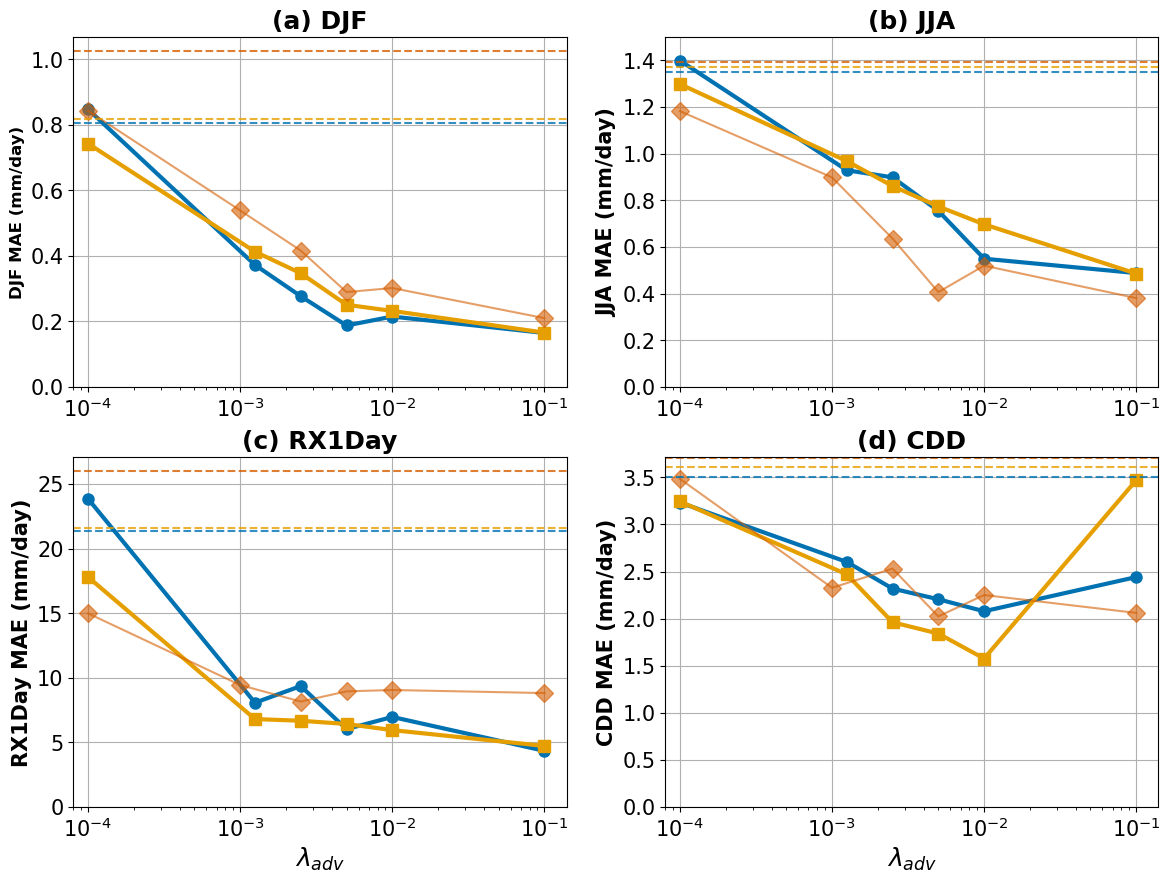

In [24]:
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
ax = ax.ravel()

# Define colors and markers
colors = ['#0072B2', '#E69F00', '#D55E00']
markers = ['o', 's', 'D']
labels = ['(1) GAN$_{ACCESS-CM2}$ IC, BN, $MSE(y_{pred}, y_{true})$, 3.5M Params', '(2) GAN$_{ACCESS-CM2}$ IC, $MSE(y_{pred}, y_{true})$, 3.5M Params','(3) GAN$_{ACCESS-CM2}$ IC, $MSE(\sum_i y_{pred_i}, y_{true})$ 1.5M Params',
          '(1) Deterministic$_{ACCESS-CM2}$',
          '(2) Deterministic$_{ACCESS-CM2}$',
          '(3) Deterministic$_{ACCESS-CM2}$']

# Plot data with adjusted colors and markers
for i, (var_lr, var_ic, var_lr_N, var_ic_N) in enumerate([(MAE_icv2.DJF_rainfall, MAE_lc_nobn.DJF_rainfall, MAE_ic .DJF_rainfall, MAE_ic.DJF_rainfall), 
                                                           (MAE_icv2.JJA_rainfall, MAE_lc_nobn.JJA_rainfall, MAE_ic .JJA_rainfall, MAE_ic.JJA_rainfall), 
                                                           (MAE_icv2.rx1day, MAE_lc_nobn.rx1day, MAE_ic.rx1day, MAE_ic .rx1day), 
                                                           (MAE_icv2.cdd, MAE_lc_nobn.cdd, MAE_ic.cdd, MAE_ic.cdd)]):
    var_lr.isel(experiment=slice(1, None)).to_pandas().plot(ax=ax[i], marker=markers[0], color=colors[0], label='GAN', ls='-', ms = 8, lw =3)
    var_ic.isel(experiment=slice(1, None)).to_pandas().plot(ax=ax[i], marker=markers[1], color=colors[1], label='GAN \n(Intensity Constraint)', ls='-', ms =8, lw =3)

    #var_lr_N.isel(experiment=slice(1, None)).to_pandas().plot(ax=ax[i], marker=markers[2], color=colors[2], label='GAN \n (Average Constraint)', ls='-', alpha=0.6, ms =9)
    var_ic_N.isel(experiment=slice(1, None)).to_pandas().plot(ax=ax[i], marker=markers[2], color=colors[2], label='GAN \n (Intensity Constraint/ EC-Earth3)', ls='-', alpha=0.6, ms =9)

    ax[i].axhline(var_lr.isel(experiment =0).values, color = colors[0], alpha =0.8,label='GAN',ls ='--')
    ax[i].axhline(var_ic.isel(experiment =0).values, color = colors[1], alpha =0.8,label='GAN \n(Intensity Constraint)', ls ='--')
    ax[i].axhline(var_ic_N.isel(experiment =0).values, color = colors[2], alpha =0.8,label='GAN \n(Intensity Constraint)', ls ='--')
    # ax[i].scatter(0.11, var_lr_N.isel(experiment =0).values, s =150, color = colors[2], alpha =0.6)
    # ax[i].scatter(0.11, var_ic_N.isel(experiment =0).values, s =150, color = colors[3], alpha =0.6)
# Add other subplots similarly

# Add legend and other configurations
for axis in ax:
    #axis.legend()
    #axis.set_yscale('log')
    axis.set_xscale('log')
    axis.tick_params(labelsize =15)
    axis.set_xlim(8e-5, 0.14)
    axis.set_xlabel(' ')
    axis.set_ylim(0, axis.get_ylim()[-1])
    axis.grid('on')
ax[1].set_ylim(0, 1.5)   
ax[-1].set_xlabel('$\lambda_{adv}$', fontsize=18)
ax[-2].set_xlabel('$\lambda_{adv}$', fontsize=18)
ax[0].set_ylabel('DJF MAE (mm/day)', fontsize =12, weight ='bold')
ax[1].set_ylabel('JJA MAE (mm/day)', fontsize =15, weight ='bold')
ax[2].set_ylabel('RX1Day MAE (mm/day)', fontsize =15, weight ='bold')
ax[3].set_ylabel('CDD MAE (mm/day)', fontsize =15, weight ='bold')
ax[0].set_title('(a) DJF', weight ='bold', fontsize =18)
ax[1].set_title('(b) JJA', weight ='bold', fontsize =18)
ax[2].set_title('(c) RX1Day', weight ='bold', fontsize =18)
ax[3].set_title('(d) CDD', weight ='bold', fontsize =18)
#fig.legend(labels=labels, loc='lower center', ncol=2, fontsize =15,bbox_to_anchor = (0.45, -0.005))
#plt.tight_layout()
#fig.savefig(f'/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/intermediate_outputs/comparison_between_arch_seasonal_performance_v2.png', dpi =500, bbox_inches ='tight')
plt.show()


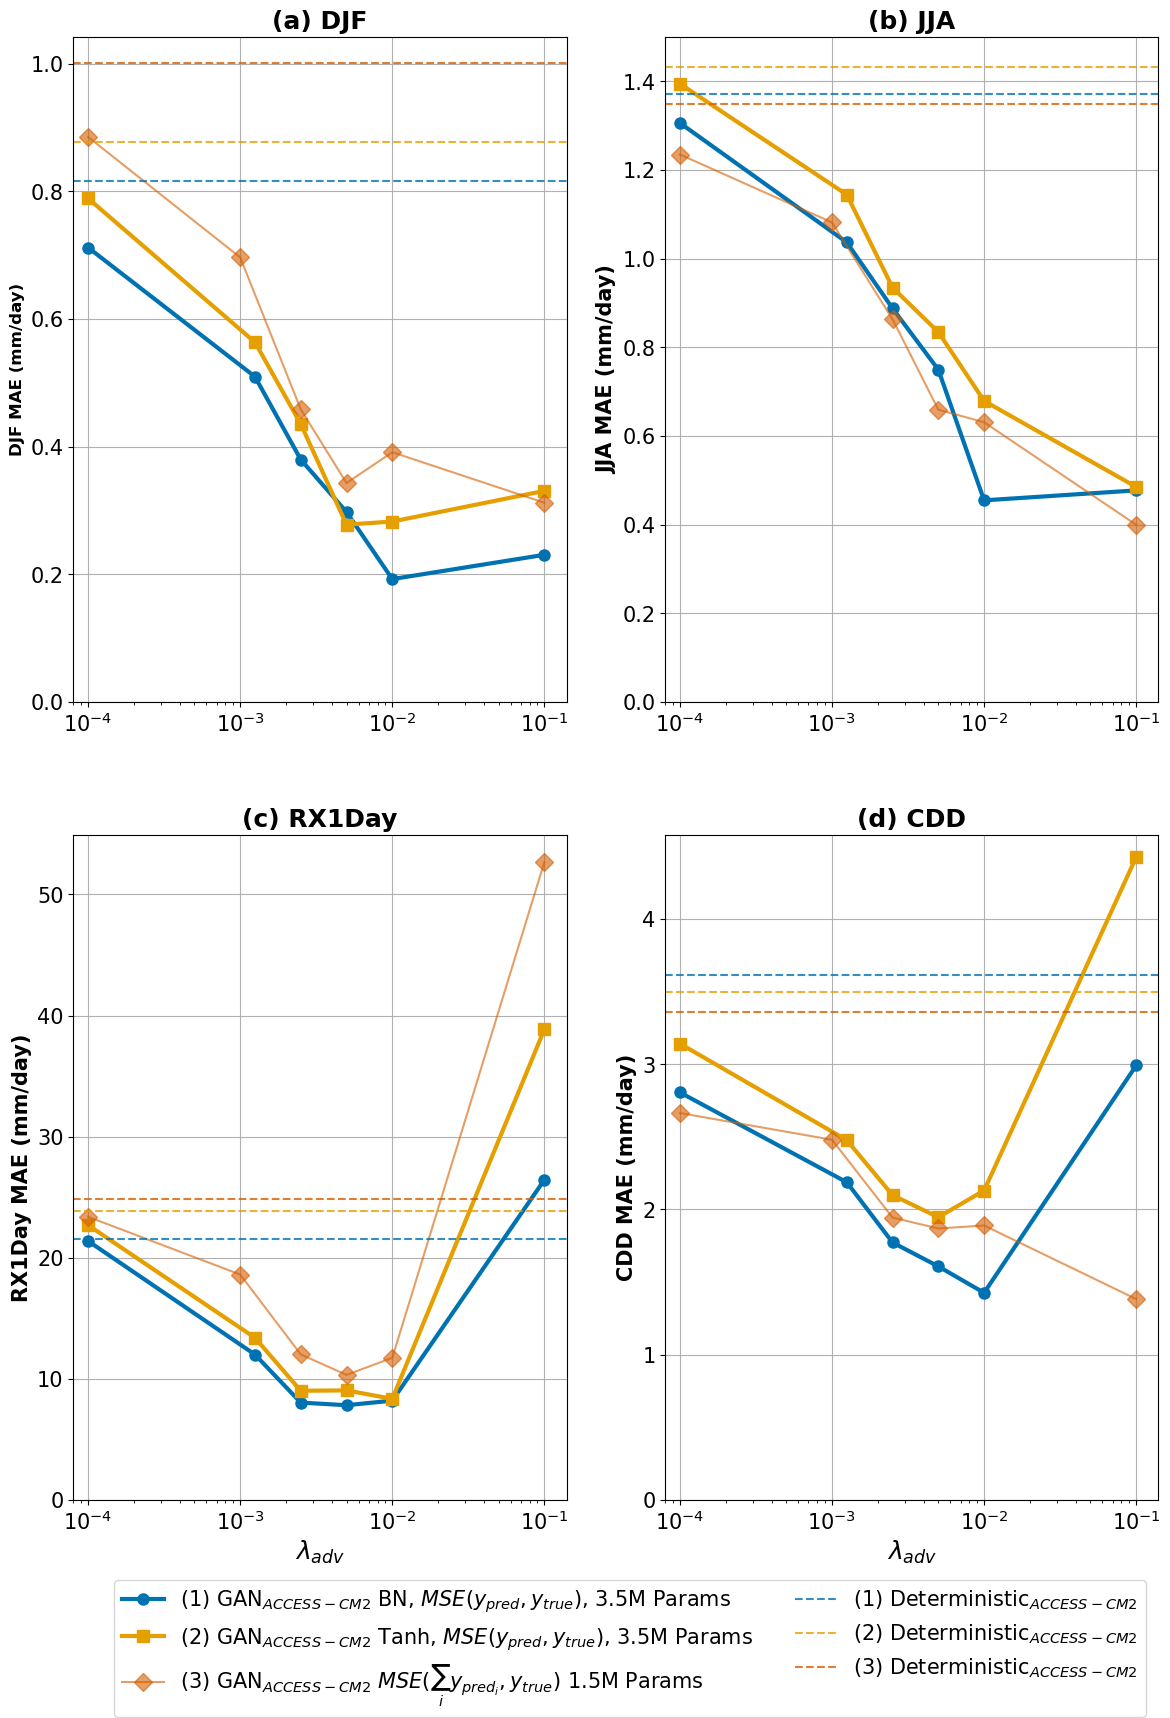

In [33]:
fig, ax = plt.subplots(2, 2, figsize=(14, 19))
ax = ax.ravel()

# Define colors and markers
colors = ['#0072B2', '#E69F00', '#D55E00']
markers = ['o', 's', 'D']
labels = ['(1) GAN$_{ACCESS-CM2}$ BN, $MSE(y_{pred}, y_{true})$, 3.5M Params', '(2) GAN$_{ACCESS-CM2}$ Tanh, $MSE(y_{pred}, y_{true})$, 3.5M Params','(3) GAN$_{ACCESS-CM2}$ $MSE(\sum_i y_{pred_i}, y_{true})$ 1.5M Params',
          '(1) Deterministic$_{ACCESS-CM2}$',
          '(2) Deterministic$_{ACCESS-CM2}$',
          '(3) Deterministic$_{ACCESS-CM2}$']

# Plot data with adjusted colors and markers
for i, (var_lr, var_ic, var_lr_N, var_ic_N) in enumerate([(MAE_noic_v2.DJF_rainfall, MAE_tanh.DJF_rainfall, MAE_lr .DJF_rainfall, MAE_lr.DJF_rainfall), 
                                                           (MAE_noic_v2.JJA_rainfall,MAE_tanh.JJA_rainfall, MAE_lr .JJA_rainfall, MAE_lr.JJA_rainfall), 
                                                           (MAE_noic_v2.rx1day, MAE_tanh.rx1day, MAE_lr.rx1day, MAE_lr .rx1day), 
                                                           (MAE_noic_v2.cdd, MAE_tanh.cdd, MAE_lr.cdd, MAE_lr.cdd)]):
    var_lr.isel(experiment=slice(1, None)).to_pandas().plot(ax=ax[i], marker=markers[0], color=colors[0], label='GAN', ls='-', ms = 8, lw =3)
    var_ic.isel(experiment=slice(1, None)).to_pandas().plot(ax=ax[i], marker=markers[1], color=colors[1], label='GAN \n(Intensity Constraint)', ls='-', ms =8, lw =3)

    #var_lr_N.isel(experiment=slice(1, None)).to_pandas().plot(ax=ax[i], marker=markers[2], color=colors[2], label='GAN \n (Average Constraint)', ls='-', alpha=0.6, ms =9)
    var_ic_N.isel(experiment=slice(1, None)).to_pandas().plot(ax=ax[i], marker=markers[2], color=colors[2], label='GAN \n (Intensity Constraint/ EC-Earth3)', ls='-', alpha=0.6, ms =9)

    ax[i].axhline(var_lr.isel(experiment =0).values, color = colors[0], alpha =0.8,label='GAN',ls ='--')
    ax[i].axhline(var_ic.isel(experiment =0).values, color = colors[1], alpha =0.8,label='GAN \n(Intensity Constraint)', ls ='--')
    ax[i].axhline(var_ic_N.isel(experiment =0).values, color = colors[2], alpha =0.8,label='GAN \n(Intensity Constraint)', ls ='--')
    # ax[i].scatter(0.11, var_lr_N.isel(experiment =0).values, s =150, color = colors[2], alpha =0.6)
    # ax[i].scatter(0.11, var_ic_N.isel(experiment =0).values, s =150, color = colors[3], alpha =0.6)
# Add other subplots similarly

# Add legend and other configurations
for axis in ax:
    #axis.legend()
    #axis.set_yscale('log')
    axis.set_xscale('log')
    axis.tick_params(labelsize =15)
    axis.set_xlim(8e-5, 0.14)
    axis.set_xlabel(' ')
    axis.set_ylim(0, axis.get_ylim()[-1])
    axis.grid('on')
ax[1].set_ylim(0, 1.5)   
ax[-1].set_xlabel('$\lambda_{adv}$', fontsize=18)
ax[-2].set_xlabel('$\lambda_{adv}$', fontsize=18)
ax[0].set_ylabel('DJF MAE (mm/day)', fontsize =12, weight ='bold')
ax[1].set_ylabel('JJA MAE (mm/day)', fontsize =15, weight ='bold')
ax[2].set_ylabel('RX1Day MAE (mm/day)', fontsize =15, weight ='bold')
ax[3].set_ylabel('CDD MAE (mm/day)', fontsize =15, weight ='bold')
ax[0].set_title('(a) DJF', weight ='bold', fontsize =18)
ax[1].set_title('(b) JJA', weight ='bold', fontsize =18)
ax[2].set_title('(c) RX1Day', weight ='bold', fontsize =18)
ax[3].set_title('(d) CDD', weight ='bold', fontsize =18)
fig.legend(labels=labels, loc='lower center', ncol=2, fontsize =15,bbox_to_anchor = (0.45, -0.005))
#plt.tight_layout()
fig.savefig(f'/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/intermediate_outputs/tanh_comparison_between_arch_seasonal_performance.png', dpi =500, bbox_inches ='tight')
plt.show()


In [28]:
    (MAE_icv2.rx1day, MAE_lc_nobn.rx1day, MAE_lr_N.rx1day, MAE_ic.rx1day)

(<xarray.DataArray 'rx1day' (experiment: 7)>
 array([21.367065 , 23.847874 ,  8.068042 ,  9.356024 ,  6.0236816,
         6.9656644,  4.342009 ], dtype=float32)
 Coordinates:
   * experiment  (experiment) float64 0.0 0.0001 0.00125 0.0025 0.005 0.01 0.1,
 <xarray.DataArray 'rx1day' (experiment: 7)>
 array([21.577635 , 17.791073 ,  6.802778 ,  6.670599 ,  6.4215155,
         5.9468436,  4.720597 ], dtype=float32)
 Coordinates:
   * experiment  (experiment) float64 0.0 0.0001 0.00125 0.0025 0.005 0.01 0.1,
 <xarray.DataArray 'rx1day' (experiment: 4)>
 array([21.386406,  9.175964,  9.181724,  8.183203], dtype=float32)
 Coordinates:
   * experiment  (experiment) float64 0.0 0.005 0.01 0.1,
 <xarray.DataArray 'rx1day' (experiment: 7)>
 array([26.013123 , 14.9820175,  9.435145 ,  8.156312 ,  8.946496 ,
         9.0520735,  8.813987 ], dtype=float32)
 Coordinates:
   * experiment  (experiment) float64 0.0 0.0001 0.001 0.0025 0.005 0.01 0.1)

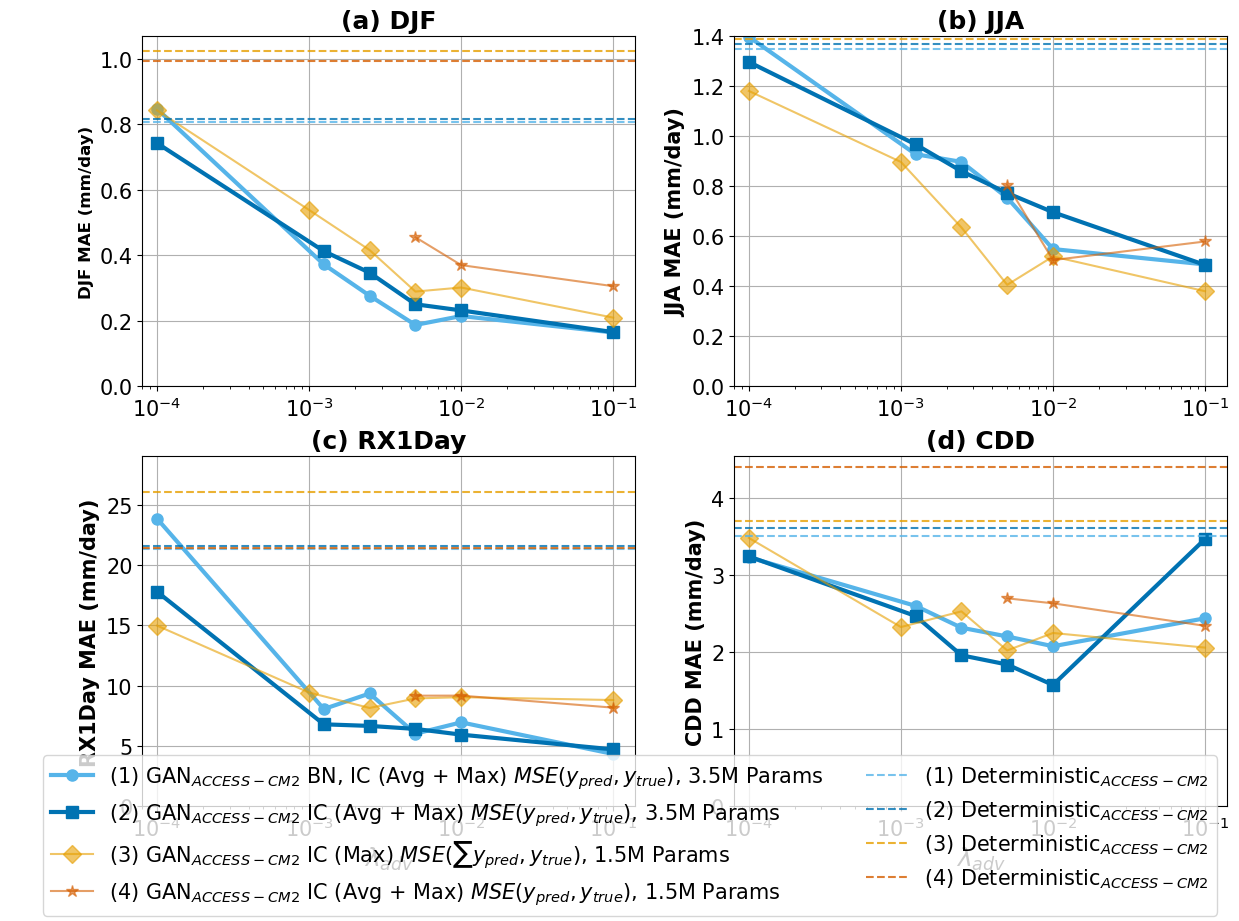

In [38]:
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
ax = ax.ravel()
#0072B2 (deep blue)
#56B4E9 (light blue)
#E69F00 (medium orange)
#D55E00 (dark orange)
# Define colors and markers
colors = ['#56B4E9', '#0072B2', '#E69F00', '#D55E00']
markers = ['o', 's', 'D','*']
labels = ['(1) GAN$_{ACCESS-CM2}$ BN, IC (Avg + Max) $MSE(y_{pred}, y_{true})$, 3.5M Params', '(2) GAN$_{ACCESS-CM2}$ IC (Avg + Max) $MSE(y_{pred}, y_{true})$, 3.5M Params',
          '(3) GAN$_{ACCESS-CM2}$ IC (Max) $MSE(\sum y_{pred}, y_{true})$, 1.5M Params', '(4) GAN$_{ACCESS-CM2}$ IC (Avg + Max) $MSE(y_{pred}, y_{true})$, 1.5M Params',
          '(1) Deterministic$_{ACCESS-CM2}$',
          '(2) Deterministic$_{ACCESS-CM2}$',
          '(3) Deterministic$_{ACCESS-CM2}$',
          '(4) Deterministic$_{ACCESS-CM2}$']


# Plot data with adjusted colors and markers

for i, (var_lr, var_ic, var_lr_N, var_ic_N) in enumerate([(MAE_icv2.DJF_rainfall, MAE_lc_nobn.DJF_rainfall, MAE_ic.DJF_rainfall, MAE_lr_N.DJF_rainfall), 
                                                           (MAE_icv2.JJA_rainfall, MAE_lc_nobn.JJA_rainfall, MAE_ic.JJA_rainfall, MAE_lr_N.JJA_rainfall), 
                                                           (MAE_icv2.rx1day, MAE_lc_nobn.rx1day, MAE_ic.rx1day, MAE_lr_N.rx1day), 
                                                           (MAE_icv2.cdd, MAE_lc_nobn.cdd, MAE_ic.cdd, MAE_lr_N.cdd)]):
    var_lr.isel(experiment=slice(1, None)).to_pandas().plot(ax=ax[i], marker=markers[0], color=colors[0], label='GAN', ls='-', ms = 8, lw =3)
    var_ic.isel(experiment=slice(1, None)).to_pandas().plot(ax=ax[i], marker=markers[1], color=colors[1], label='GAN \n(Intensity Constraint)', ls='-', ms =8, lw =3)

    #var_lr_N.isel(experiment=slice(1, None)).to_pandas().plot(ax=ax[i], marker=markers[2], color=colors[2], label='GAN \n (Average Constraint)', ls='-', alpha=0.6, ms =9)
    var_lr_N.isel(experiment=slice(1, None)).to_pandas().plot(ax=ax[i], marker=markers[2], color=colors[2], label='GAN \n (Intensity Constraint/ EC-Earth3)', ls='-', alpha=0.6, ms =9)

    var_ic_N.isel(experiment=slice(1, None)).to_pandas().plot(ax=ax[i], marker=markers[3], color=colors[3], label='GAN \n (Intensity Constraint/ EC-Earth3)', ls='-', alpha=0.6, ms =9)

    ax[i].axhline(var_lr.isel(experiment =0).values, color = colors[0], alpha =0.8,label='GAN',ls ='--')
    ax[i].axhline(var_ic.isel(experiment =0).values, color = colors[1], alpha =0.8,label='GAN \n(Intensity Constraint)', ls ='--')
    ax[i].axhline(var_lr_N.isel(experiment =0).values, color = colors[2], alpha =0.8,label='GAN \n(Intensity Constraint)', ls ='--')
    ax[i].axhline(var_ic_N.isel(experiment =0).values, color = colors[3], alpha =0.8,label='GAN \n(Intensity Constraint)', ls ='--')
    # ax[i].scatter(0.11, var_lr_N.isel(experiment =0).values, s =150, color = colors[2], alpha =0.6)
    # ax[i].scatter(0.11, var_ic_N.isel(experiment =0).values, s =150, color = colors[3], alpha =0.6)
# Add other subplots similarly

# Add legend and other configurations
for axis in ax:
    #axis.legend()
    #axis.set_yscale('log')
    axis.set_xscale('log')
    axis.tick_params(labelsize =15)
    axis.set_xlim(8e-5, 0.14)
    axis.set_xlabel(' ')
    axis.set_ylim(0, axis.get_ylim()[-1])
    axis.grid('on')
ax[1].set_ylim(0, 1.4)   
ax[-1].set_xlabel('$\lambda_{adv}$', fontsize=18)
ax[-2].set_xlabel('$\lambda_{adv}$', fontsize=18)
ax[0].set_ylabel('DJF MAE (mm/day)', fontsize =12, weight ='bold')
ax[1].set_ylabel('JJA MAE (mm/day)', fontsize =15, weight ='bold')
ax[2].set_ylabel('RX1Day MAE (mm/day)', fontsize =15, weight ='bold')
ax[3].set_ylabel('CDD MAE (mm/day)', fontsize =15, weight ='bold')
ax[0].set_title('(a) DJF', weight ='bold', fontsize =18)
ax[1].set_title('(b) JJA', weight ='bold', fontsize =18)
ax[2].set_title('(c) RX1Day', weight ='bold', fontsize =18)
ax[3].set_title('(d) CDD', weight ='bold', fontsize =18)
ax[2].set_ylim(0,29
              )
#fig.legend(labels=labels, loc='lower center', ncol=2, fontsize =15,bbox_to_anchor = (0.45, -0.005))
#plt.tight_layout()
fig.savefig(f'/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/intermediate_outputs/All_outputs_{gcm}_average_content.png', dpi =500, bbox_inches ='tight')
plt.show()


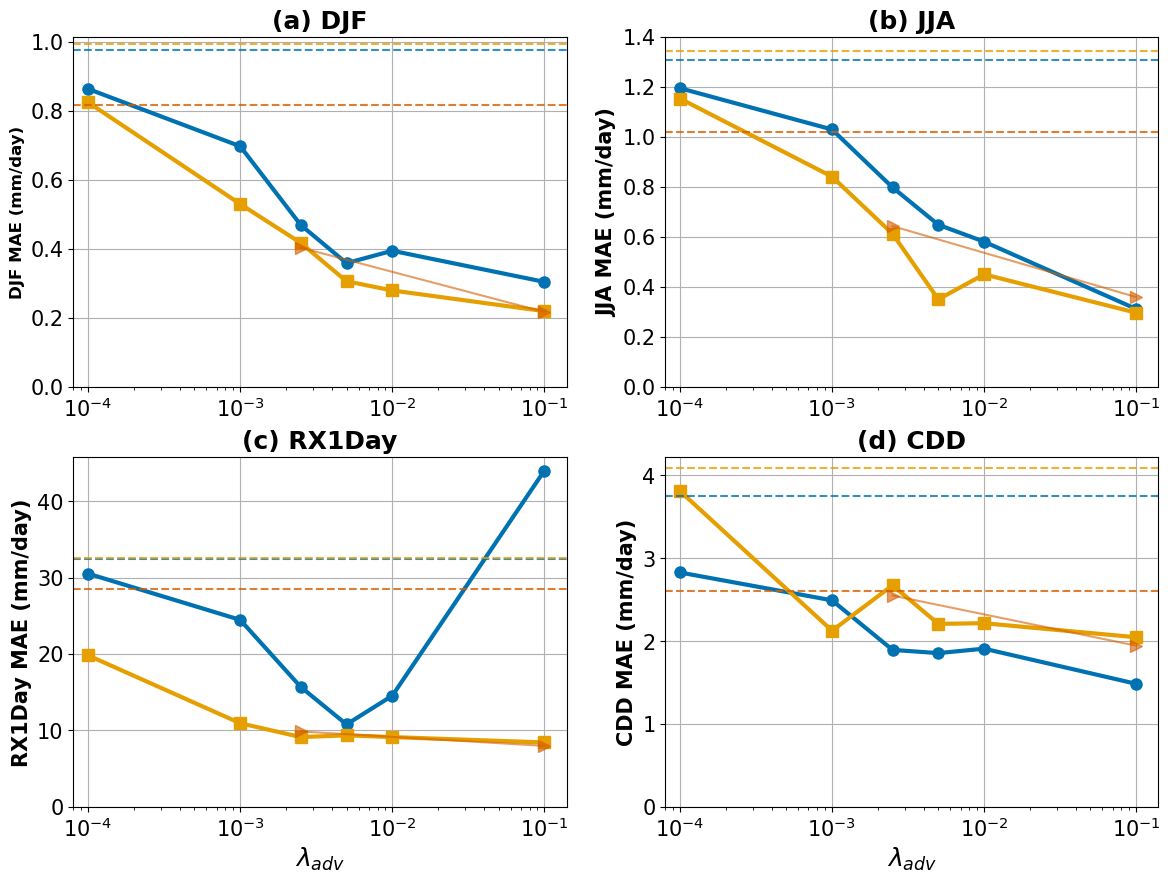

In [141]:
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
ax = ax.ravel()

# Define colors and markers
colors = ['#0072B2', '#E69F00', '#D55E00']
markers = ['o', 's', '>']
labels = ['GAN$_{ACCESS-CM2}$', 'GAN$_{ACCESS-CM2}$ \n(IC)','GAN$_{ACCESS-CM2}$ \n (IC + Average)', 'Deterministic$_{ACCESS-CM2}$', 'Deterministic$_{ACCESS-CM2}$ \n (IC)',
          'Deterministic$_{ACCESS-CM2}$ \n (IC + Average)']

# Plot data with adjusted colors and markers
for i, (var_lr, var_ic, var_lr_N, var_ic_N) in enumerate([(MAE_lr.DJF_rainfall, MAE_ic.DJF_rainfall, MAE_lr_N.DJF_rainfall, MAE_ic_N.DJF_rainfall), 
                                                           (MAE_lr.JJA_rainfall, MAE_ic.JJA_rainfall, MAE_lr_N.JJA_rainfall, MAE_ic_N.JJA_rainfall), 
                                                           (MAE_lr.rx1day, MAE_ic.rx1day, MAE_lr_N.rx1day, MAE_ic_N.rx1day), 
                                                           (MAE_lr.cdd, MAE_ic.cdd, MAE_lr_N.cdd, MAE_ic_N.cdd)]):
    var_lr.isel(experiment=slice(1, None)).to_pandas().plot(ax=ax[i], marker=markers[0], color=colors[0], label='GAN', ls='-', ms = 8, lw =3)
    var_ic.isel(experiment=slice(1, None)).to_pandas().plot(ax=ax[i], marker=markers[1], color=colors[1], label='GAN \n(Intensity Constraint)', ls='-', ms =8, lw =3)

    #var_lr_N.isel(experiment=slice(1, None)).to_pandas().plot(ax=ax[i], marker=markers[2], color=colors[2], label='GAN \n (Average Constraint)', ls='-', alpha=0.6, ms =9)
    var_lr_N.isel(experiment=slice(1, None)).to_pandas().plot(ax=ax[i], marker=markers[2], color=colors[2], label='GAN \n (Intensity Constraint/ EC-Earth3)', ls='-', alpha=0.6, ms =9)

    ax[i].axhline(var_lr.isel(experiment =0).values, color = colors[0], alpha =0.8,label='GAN',ls ='--')
    ax[i].axhline(var_ic.isel(experiment =0).values, color = colors[1], alpha =0.8,label='GAN \n(Intensity Constraint)', ls ='--')
    ax[i].axhline(var_ic_N.isel(experiment =0).values, color = colors[2], alpha =0.8,label='GAN \n(Intensity Constraint)', ls ='--')
    # ax[i].scatter(0.11, var_lr_N.isel(experiment =0).values, s =150, color = colors[2], alpha =0.6)
    # ax[i].scatter(0.11, var_ic_N.isel(experiment =0).values, s =150, color = colors[3], alpha =0.6)
# Add other subplots similarly

# Add legend and other configurations
for axis in ax:
    #axis.legend()
    #axis.set_yscale('log')
    axis.set_xscale('log')
    axis.tick_params(labelsize =15)
    axis.set_xlim(8e-5, 0.14)
    axis.set_xlabel(' ')
    axis.set_ylim(0, axis.get_ylim()[-1])
    axis.grid('on')
ax[1].set_ylim(0, 1.4)   
ax[-1].set_xlabel('$\lambda_{adv}$', fontsize=18)
ax[-2].set_xlabel('$\lambda_{adv}$', fontsize=18)
ax[0].set_ylabel('DJF MAE (mm/day)', fontsize =12, weight ='bold')
ax[1].set_ylabel('JJA MAE (mm/day)', fontsize =15, weight ='bold')
ax[2].set_ylabel('RX1Day MAE (mm/day)', fontsize =15, weight ='bold')
ax[3].set_ylabel('CDD MAE (mm/day)', fontsize =15, weight ='bold')
ax[0].set_title('(a) DJF', weight ='bold', fontsize =18)
ax[1].set_title('(b) JJA', weight ='bold', fontsize =18)
ax[2].set_title('(c) RX1Day', weight ='bold', fontsize =18)
ax[3].set_title('(d) CDD', weight ='bold', fontsize =18)
#fig.legend(labels=labels, loc='lower center', ncol=2, fontsize =15,bbox_to_anchor = (0.45, -0.005))
#plt.tight_layout()
fig.savefig(f'/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/intermediate_outputs/average_constraint_with_inten_v2_{gcm}.png', dpi =500, bbox_inches ='tight')
plt.show()


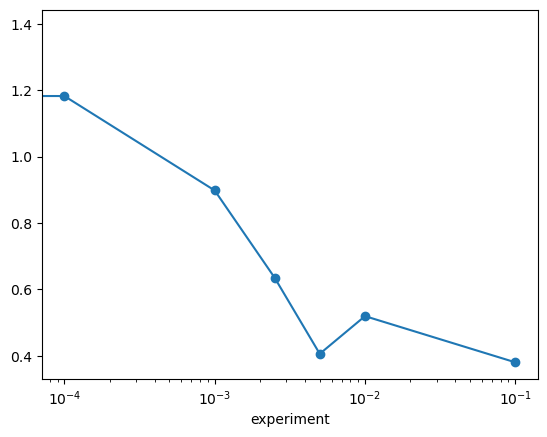

In [25]:
fig, ax = plt.subplots()
error.to_pandas().JJA_rainfall.plot(ax = ax, marker ='o')
ax.set_xscale('log')

In [1]:
# loading the original dataset
output_model_name = 'LeakyRelu_Activation'
dsets_lr = xr.open_dataset(f'/nesi/project/niwa00018/ML_downscaling_CCAM/training_GAN/paper_experiments/outputs/{output_model_name}/{models}_{output_model_name}_hist_1986_2005_cascaded_{frameworks}_applied.nc',
                chunks = {"member": 1})#.isel(time = slice(0,3000))
output_model_name = 'Intensity_Penalty'
dsets_ic = xr.open_dataset(f'/nesi/project/niwa00018/ML_downscaling_CCAM/training_GAN/paper_experiments/outputs/{output_model_name}/{models}_{output_model_name}_hist_1986_2005_cascaded_{frameworks}_applied.nc',
                chunks = {"member": 1})#.isel(time = slice(0,3000))


df_raw, df, y = load_and_concatenate_hist(models)

# with ProgressBar():
#     dsets_lr = dsets_lr.load()
#     dsets_ic = dsets_ic.load()
#     y = y.load()

NameError: name 'xr' is not defined

In [10]:
dsets_lr = dsets_lr.chunk({"time":-1, "lat":10, "lon":10,"member":-1})

In [11]:
dsets_ic = dsets_ic.chunk({"time":-1, "lat":10, "lon":10,"member":-1})

In [12]:
y = y.chunk({"time":-1, "lat":30, "lon":30})

In [13]:
dsets_lr = dsets_lr.clip(0,2000)

In [7]:
crps_lr = xs.crps_ensemble(y.pr.sel(time = dsets_lr.time), dsets_lr.pr, dim ="time")

In [8]:
with ProgressBar():
    crps_lr = crps_lr.compute()

[                                        ] | 0% Completed |  0.0s[########################################] | 100% Completed |  1min 47.5s


In [9]:
crps_lr.to_netcdf(r'/nesi/project/niwa00018/ML_downscaling_CCAM/training_GAN/paper_experiments/outputs/crps_outputs/Leaky_Relu_crps.nc')

In [10]:
crps_ic = xs.crps_ensemble(y.pr.sel(time = dsets_ic.time), dsets_ic.pr, dim ="time")

In [11]:
with ProgressBar():
    crps_ic = crps_ic.compute()

[########################################] | 100% Completed |  1min 36.6s


In [13]:
crps_lr.to_netcdf(r'/nesi/project/niwa00018/ML_downscaling_CCAM/training_GAN/paper_experiments/outputs/crps_outputs/Intensity_Penalty_crps.nc')

In [15]:
with ProgressBar():
    mae = abs(y.pr.sel(time = dsets_ic.time) - dsets_lr.pr).mean(["lat","lon","time","member"]).compute()

[########################################] | 100% Completed |  1min 47.2s


In [14]:
with ProgressBar():
    mae_ic = abs(y.pr.sel(time = dsets_ic.time) - dsets_ic.pr).mean(["lat","lon","time","member"]).compute()

[########################################] | 100% Completed |  1min 14.7s


In [16]:
mae_ic.to_netcdf(r'/nesi/project/niwa00018/ML_downscaling_CCAM/training_GAN/paper_experiments/outputs/crps_outputs/Intensity_Penalty_mae.nc')
mae.to_netcdf(r'/nesi/project/niwa00018/ML_downscaling_CCAM/training_GAN/paper_experiments/outputs/crps_outputs/LeakyRelu_mae.nc')

In [22]:
colors

['tab:red', 'tab:green', 'tab:blue', 'tab:orange']

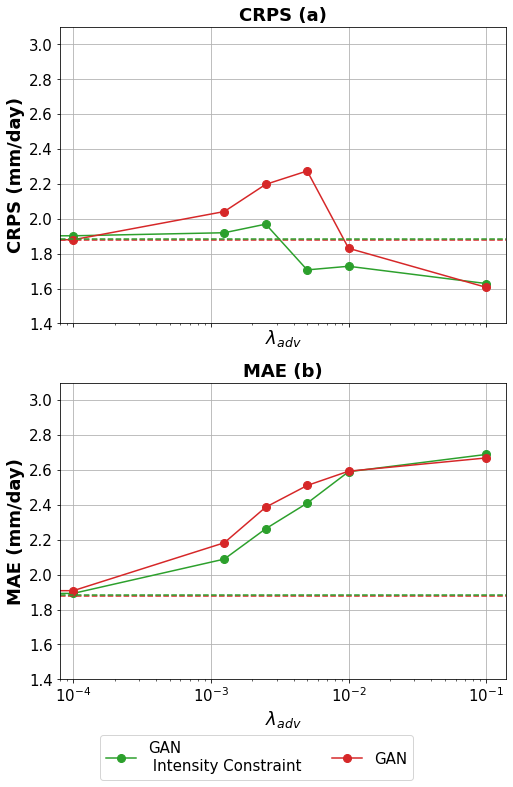

In [26]:
fig, ax = plt.subplots(2,1,figsize = (8, 12), sharex =True, sharey =True)
colors = ['tab:red', 'tab:green', 'tab:blue', 'tab:orange']
markers = ['o', 's', 'x', 'D']
crps_ic.mean(["lat","lon"]).plot(ax = ax[0], marker ='o', color = colors[1], ms =8, label ='GAN \n Intensity Constraint')
crps_lr.mean(["lat","lon"]).plot(ax = ax[0], marker ='o', color = colors[0], ms =8, label ='GAN')
mae.plot(ax = ax[1], marker ='o', color =colors[1], ls ='-', alpha =1, ms =8, label ='GAN')

mae_ic.plot(ax = ax[1], marker ='o', color =colors[0], ls ='-', alpha =1, ms =8, label ='GAN \n Intensity Constraint')
ax[0].axhline(mae_ic.isel(experiment =0).values, color = colors[0], ls ='--')
ax[0].axhline(mae.isel(experiment =0).values, color = colors[1], ls ='--')

ax[1].axhline(mae_ic.isel(experiment =0).values, color = colors[0], ls ='--')
ax[1].axhline(mae.isel(experiment =0).values, color = colors[1], ls ='--')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[0].tick_params(labelsize =15)
ax[1].tick_params(labelsize =15)
ax[0].set_xlim(8e-5, 0.14)
ax[1].set_xlim(8e-5, 0.14)
ax[0].set_xlabel('$\lambda_{adv}$', fontsize =18, weight ='bold')
ax[1].set_xlabel('$\lambda_{adv}$', fontsize =18, weight ='bold')
ax[0].set_ylabel('CRPS (mm/day)', fontsize =18, weight ='bold')
ax[1].set_ylabel('MAE (mm/day)', fontsize =18, weight ='bold')
#ax.set_ylabel('MAE/CRPS (mm/day)', fontsize =18, weight ='bold')
#ax[0].legend(loc ='upper left', ncol =2, fontsize =12)
#ax[1].legend(loc ='upper left', ncol =2, fontsize =12)
ax[0].set_ylim(1.4,3.1)
ax[1].set_ylim(1.4,3.1)
ax[0].grid('on')
ax[1].grid('on')
fig.legend(labels=['GAN\n Intensity Constraint','GAN'], loc='lower center', ncol=2, fontsize =15)
ax[0].set_title('CRPS (a)', fontsize =18, weight ='bold')
ax[1].set_title('MAE (b)', fontsize =18, weight ='bold')
fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/training_GAN/figures/overall_results/CRPS_mae_overall_ec_earth3_V2.png', dpi =500, bbox_inches ='tight')

In [2]:
x=2

In [53]:
rmse_ic = np.sqrt(abs(dsets_ic.sel(time = dsets_ic.time).mean("member") - y.sel(time = dsets_ic.time))**2)
rmss_ic = np.sqrt((abs(dsets_ic.sel(time = dsets_ic.time).mean("member") - dsets_ic.sel(time = dsets_ic.time))**2).mean("member"))

with ProgressBar():
    rmse_ic = rmse_ic.load()
    rmss_ic = rmss_ic.load()

[########################################] | 100% Completed |  1min  4.0s
[########################################] | 100% Completed |  1min  6.7s


In [52]:
rmse_lr = np.sqrt(abs(dsets_lr.sel(time = dsets_lr.time).mean("member") - y.sel(time = dsets_lr.time))**2)
rmss_lr = np.sqrt((abs(dsets_lr.sel(time = dsets_lr.time).mean("member") - dsets_lr.sel(time = dsets_lr.time))**2).mean("member"))

with ProgressBar():
    rmse_lr = rmse_lr.load()
    rmss_lr = rmss_lr.load()

[########################################] | 100% Completed |  1min 25.0s
[########################################] | 100% Completed |  1min 21.6s


In [17]:
cmap = plt.cm.RdBu
marker_types = ['o', 's', '^', 'D', '*', 'x', 'P']
# Generate seven distinct colors, excluding white
colors = [cmap(i) for i in np.linspace(0,1, 25)]
colors_hist = [colors[0], colors[4], colors[7], colors[10], colors[17], colors[21], colors[-1]]


In [18]:
labels = ['$\lambda_{adv}$=' +f'{rmse_lr.experiment.values[i]}' if i>0 else 'Regression Baseline \n($\lambda_{adv}$=' +f'{rmse_lr.experiment.values[i]})' for i in range(len(rmse_lr.experiment.values))]

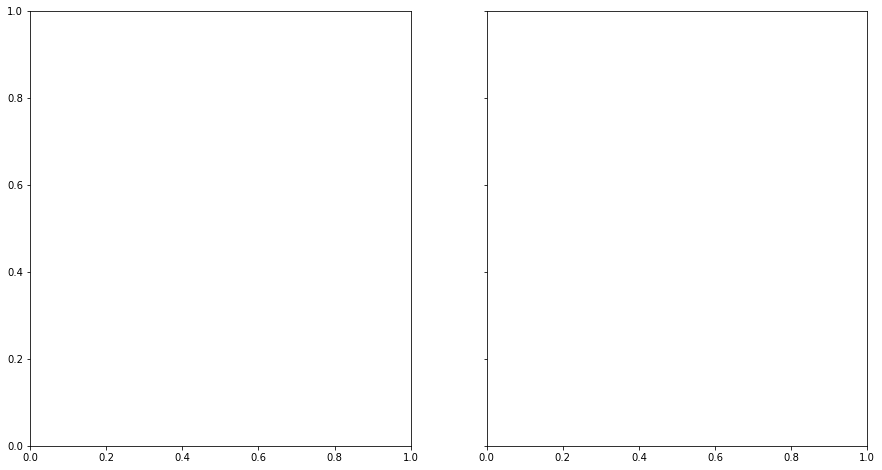

In [19]:
fig, ax = plt.subplots(1,2, figsize = (15, 8), sharex=True, sharey=True)

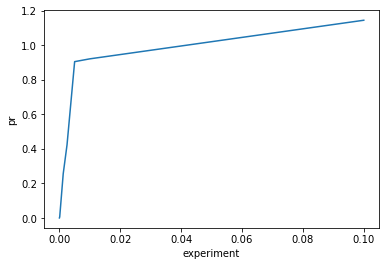

In [50]:
((1.11/0.9) * rmss_ic.mean(["lat","lon"])/rmse_ic.mean(["lat","lon"])).mean(["time"]).pr.plot()

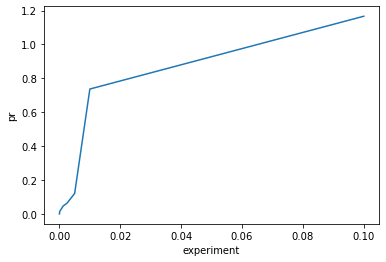

In [51]:
((1.11/0.9) * rmss_lr.mean(["lat","lon"])/rmse_lr.mean(["lat","lon"])).mean(["time"]).pr.plot()

In [62]:
rmss_ic.isel(experiment =0).pr.max()

<xarray.DataArray 'pr' ()>
array(6.10351562e-05)
Coordinates:
    experiment  float64 0.0

0
1
2
3
4
5
6


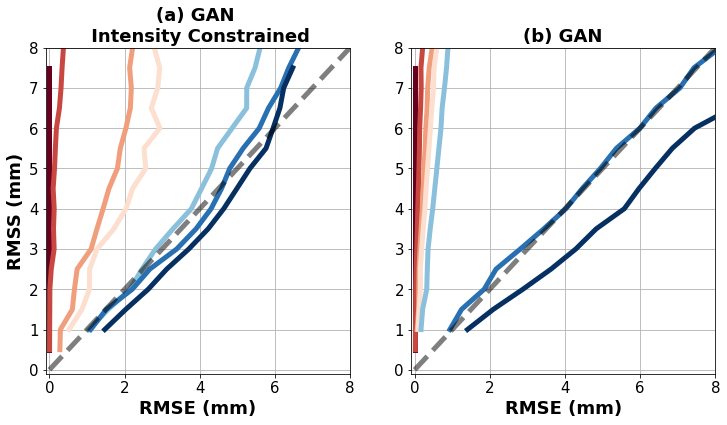

In [75]:




from scipy.stats import binned_statistic
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize = (12, 6))
bins =np.arange(0,10,0.5)
for i in range(7):
    print(i)
    x = binned_statistic(values=1.11 * rmss_ic.isel(experiment =i).mean("time").pr.values.ravel(), x=0.9* rmse_ic.isel(experiment =i).mean("time").pr.values.ravel(),  statistic ='mean', bins =bins)
    #print(f"spread-ratio:{np.mean((1.11 * rmss_ic.mean("time").isel(experiment =i).pr.values.ravel())/(0.9* rmse_ic.mean("time").isel(experiment =i).pr.values.ravel()))}")
    #ax[0].scatter(x[0], bins[:-1], color = colors_hist[i], marker = marker_types[i], s=35)
    ax[0].plot(x[0], bins[:-1], label ='$\lambda_{adv}$=' +f'{rmse_ic.experiment.values[i]}', color = colors_hist[i], lw =5)
    x1 = binned_statistic(values=1.11 * rmss_lr.isel(experiment =i).mean("time").pr.values.ravel(), x=0.9*rmse_lr.isel(experiment =i).mean("time").pr.values.ravel(),  statistic ='mean', bins =bins)
    #print(f"spread-ratio:{np.mean((1.11 * rmss_lr.isel(experiment =i).pr.values.ravel())/(0.9* rmse_lr.isel(experiment =i).pr.values.ravel()))}")
    ax[1].plot(x1[0], bins[:-1], label ='$\lambda_{adv}$=' +f'{rmse_lr.experiment.values[i]}', color = colors_hist[i], lw =5)
    #ax[1].scatter(x1[0], bins[:-1], color = colors_hist[i], marker = marker_types[i], s=35)
ax[0].plot([0,15], [0,15], ls ='--', color ='k', lw =5, alpha =0.5)
ax[0].grid('on')
ax[1].plot([0,15], [0,15], ls ='--', color ='k', lw =5,alpha =0.5)
ax[1].grid('on')

ax[0].set_xlim(-0.1, 8)
ax[0].set_ylim(-0.1,8)

ax[1].set_xlim(-0.1, 8)
ax[1].set_ylim(-0.1,8)
ax[0].set_xlabel('RMSE (mm)', fontsize=18, weight ='bold')
ax[1].set_xlabel('RMSE (mm)', fontsize=18, weight ='bold')
ax[0].set_ylabel('RMSS (mm)', fontsize=18, weight ='bold')
#ax[1].set_xlabel('RMSE (mm)', fontsize=18, weight ='bold')
ax[0].set_title('(a) GAN \n Intensity Constrained', fontsize =18, weight ='bold')
ax[1].set_title('(b) GAN', weight ='bold', fontsize =18)
ax[0].tick_params(labelsize =15)
ax[1].tick_params(labelsize =15)
#fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/training_GAN/figures/overall_results/dispersion_relationship_9_4_24.png', dpi =700, bbox_inches ='tight')
#ax4 = fig.add_axes([0.1, 0.1, 0.5, 0.1])
#fig.legend(labels=labels, loc='lower center', ncol=7, fontsize =15)



In [72]:
ax4 = fig.add_axes([0.1, 0.1, 0.5, 0.1])
fig.legend(labels=labels, loc='lower center', ncol=7, fontsize =15)
fig.show()

<ipython-input-72-dead4ff78e8a>:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax4 = fig.add_axes([0.1, 0.1, 0.5, 0.1])


0
1
2
3
4
5
6


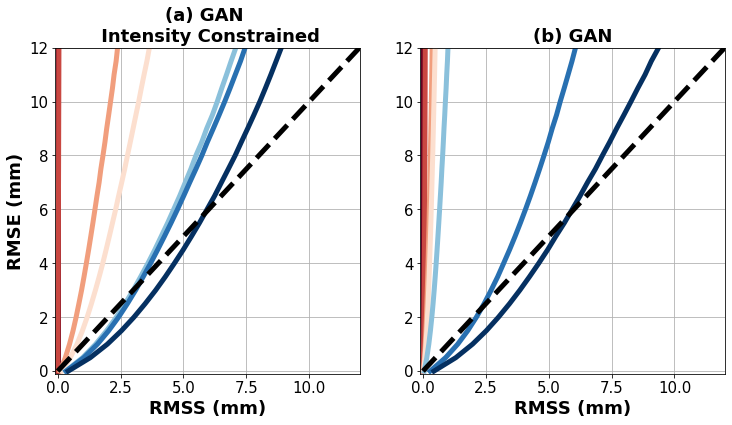

In [58]:




from scipy.stats import binned_statistic
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize = (12, 6))
bins =np.arange(0,15,0.5)
for i in range(7):
    print(i)
    x = binned_statistic(values=rmss_ic.isel(experiment =i).pr.values.ravel(), x=rmse_ic.isel(experiment =i).pr.values.ravel(),  statistic ='mean', bins =bins)
    ax[0].plot(x[0], bins[:-1], label ='$\lambda_{adv}$=' +f'{rmse_ic.experiment.values[i]}', color = colors_hist[i], lw =5)
    x1 = binned_statistic(values=rmss_lr.isel(experiment =i).pr.values.ravel(), x=rmse_lr.isel(experiment =i).pr.values.ravel(),  statistic ='mean', bins =bins)
    ax[1].plot(x1[0], bins[:-1], label ='$\lambda_{adv}$=' +f'{rmse_lr.experiment.values[i]}', color = colors_hist[i], lw =5)
ax[0].plot([0,15], [0,15], ls ='--', color ='k', lw =5)
ax[0].grid('on')
ax[1].plot([0,15], [0,15], ls ='--', color ='k', lw =5)
ax[1].grid('on')

ax[0].set_xlim(-0.1, 12)
ax[0].set_ylim(-0.1,12)

ax[1].set_xlim(-0.1, 12)
ax[1].set_ylim(-0.1,12)
ax[0].set_xlabel('RMSS (mm)', fontsize=18, weight ='bold')
ax[1].set_xlabel('RMSS (mm)', fontsize=18, weight ='bold')
ax[0].set_ylabel('RMSE (mm)', fontsize=18, weight ='bold')
ax[0].set_title('(a) GAN \n Intensity Constrained', fontsize =18, weight ='bold')
ax[1].set_title('(b) GAN', weight ='bold', fontsize =18)
ax[0].tick_params(labelsize =15)
ax[1].tick_params(labelsize =15)
#ax4 = fig.add_axes([0.1, 0.1, 0.5, 0.1])
#fig.legend(labels=labels, loc='lower center', ncol=7, fontsize =15)



In [57]:
ax4 = fig.add_axes([0.1, 0.1, 0.5, 0.1])
fig.legend(labels=labels, loc='lower center', ncol=7, fontsize =15)

BinnedStatisticResult(statistic=array([0.41775464, 1.29645777, 1.97505896, 2.53504907, 3.02983972,
       3.47542606, 3.89209565, 4.27697844, 4.63845882, 4.98822447,
       5.31745705, 5.63604678, 5.93651128, 6.23656651, 6.50914865,
       6.78325028, 7.05558806, 7.30138696, 7.55207813, 7.79703357,
       8.03541313, 8.25845601, 8.47451974, 8.68332966, 8.88981865,
       9.09729689, 9.27019031, 9.48014929, 9.64627382]), bin_edges=array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5], dtype=float32), binnumber=array([4, 4, 5, ..., 1, 1, 1]))

In [59]:
fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/training_GAN/figures/overall_results/dispesion_relationship.png', dpi =500, bbox_inches ='tight')
fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/training_GAN/figures/overall_results/dispesion_relationship.pdf', dpi =500, bbox_inches ='tight')

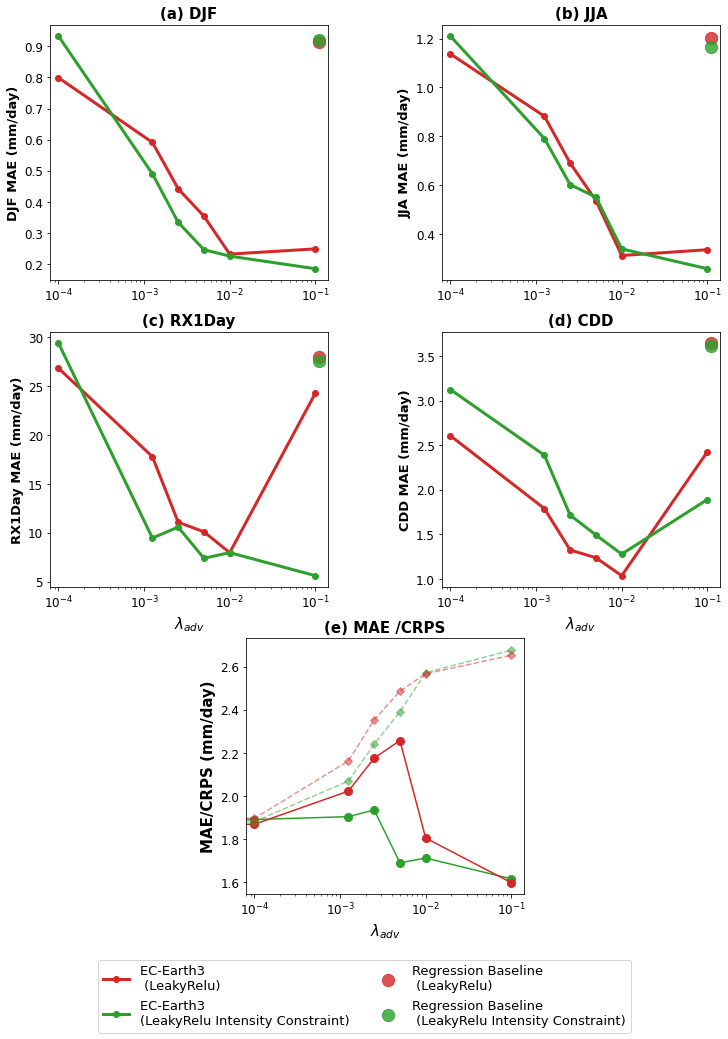

In [88]:
from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize=(12, 16))
gs = GridSpec(3, 7, figure=fig)


# Assign subplot locations in the GridSpec layout
ax1 = fig.add_subplot(gs[0, :3])
ax2 = fig.add_subplot(gs[0, 4:])
ax3 = fig.add_subplot(gs[1, :3])
ax4 = fig.add_subplot(gs[1, 4:])
ax5 = fig.add_subplot(gs[2, 2:5])
#ax4 = fig.add_subplot(gs[1, 3:])

# Define colors, markers, and labels
colors = ['tab:red', 'tab:green', 'tab:blue', 'tab:orange']
markers = ['o', 's', 'x', 'D']
labels = ['EC-Earth3 (LeakyRelu)', 'EC-Earth3 (LeakyRelu Intensity Constraint)', 
          'Regression Baseline (LeakyRelu)', 'Regression Baseline (LeakyRelu Intensity Constraint)']

colors = ['tab:red', 'tab:green', 'tab:blue', 'tab:orange']
markers = ['o', 's', 'x', 'D']
labels = ['EC-Earth3 \n (LeakyRelu)', 'EC-Earth3 \n(LeakyRelu Intensity Constraint)', 'Regression Baseline \n (LeakyRelu)', 'Regression Baseline \n (LeakyRelu Intensity Constraint)']
ax = [ax1, ax2, ax3, ax4]
# Plot data with adjusted colors and markers
for i, (var_lr, var_ic, var_lr_N, var_ic_N) in enumerate([(MAE_lr.DJF_rainfall, MAE_ic.DJF_rainfall, MAE_lr_N.DJF_rainfall, MAE_ic_N.DJF_rainfall), 
                                                           (MAE_lr.JJA_rainfall, MAE_ic.JJA_rainfall, MAE_lr_N.JJA_rainfall, MAE_ic_N.JJA_rainfall), 
                                                           (MAE_lr.rx1day, MAE_ic.rx1day, MAE_lr_N.rx1day, MAE_ic_N.rx1day), 
                                                           (MAE_lr.cdd, MAE_ic.cdd, MAE_lr_N.cdd, MAE_ic_N.cdd)]):
    var_lr.isel(experiment=slice(1, -1)).to_pandas().plot(ax=ax[i], marker=markers[0], color=colors[0], label='EC-Earth3 \n (LeakyRelu)', ls='-', ms = 6, lw =3)
    var_ic.isel(experiment=slice(1, -1)).to_pandas().plot(ax=ax[i], marker=markers[0], color=colors[1], label='EC-Earth3 \n(LeakyRelu Intensity Constraint)', ls='-', ms =6, lw =3)

    # var_lr_N.isel(experiment=slice(1, -1)).to_pandas().plot(ax=ax[i], marker=markers[2], color=colors[2], label='NorESM2-MM (LR)', ls='-', alpha=0.6, ms =3)
    # var_ic_N.isel(experiment=slice(1, -1)).to_pandas().plot(ax=ax[i], marker=markers[3], color=colors[3], label='NorESM2-MM (LR IC)', ls='--', alpha=0.6, ms =3)

    ax[i].scatter(0.11, var_lr.isel(experiment =0).values, s =150, color = colors[0], alpha =0.8,label='EC-Earth3 \n (LeakyRelu)',)
    ax[i].scatter(0.11, var_ic.isel(experiment =0).values, s =150, color = colors[1], alpha =0.8,label='EC-Earth3 \n(LeakyRelu Intensity Constraint)')

for axis in ax:
    #axis.legend()
    #axis.set_yscale('log')
    axis.set_xscale('log')
    axis.tick_params(labelsize =12)
    axis.set_xlim(8e-5, 0.14)
    axis.set_xlabel(' ')
    
ax[-1].set_xlabel('$\lambda_{adv}$', fontsize=15)
ax[-2].set_xlabel('$\lambda_{adv}$', fontsize=15)
ax[0].set_ylabel('DJF MAE (mm/day)', fontsize =13, weight ='bold')
ax[1].set_ylabel('JJA MAE (mm/day)', fontsize =13, weight ='bold')
ax[2].set_ylabel('RX1Day MAE (mm/day)', fontsize =13, weight ='bold')
ax[3].set_ylabel('CDD MAE (mm/day)', fontsize =13, weight ='bold')
ax[0].set_title('(a) DJF', weight ='bold', fontsize =15)
ax[1].set_title('(b) JJA', weight ='bold', fontsize =15)
ax[2].set_title('(c) RX1Day', weight ='bold', fontsize =15)
ax[3].set_title('(d) CDD', weight ='bold', fontsize =15)






colors = ['tab:red', 'tab:green', 'tab:blue', 'tab:orange']
markers = ['o', 's', 'x', 'D']
crps_ic.mean(["lat","lon"]).plot(ax = ax5, marker ='o', color = colors[1], ms =8)
crps_lr.mean(["lat","lon"]).plot(ax = ax5, marker ='o', color = colors[0], ms =8)
mae.plot(ax = ax5, marker ='D', color =colors[1], ls ='--', alpha =0.5, ms =6)

mae_ic.plot(ax = ax5, marker ='D', color =colors[0], ls ='--', alpha =0.5, ms =6)
ax5.set_xscale('log')
ax5.set_title('(e) MAE /CRPS', fontsize =15, weight ='bold')
ax5.tick_params(labelsize =12)
ax5.set_xlim(8e-5, 0.14)
ax5.set_xlabel('$\lambda_{adv}$', fontsize =15, weight ='bold')
ax5.set_ylabel('MAE/CRPS (mm/day)', fontsize =15, weight ='bold')




fig.legend(labels=labels, loc='lower center', ncol=2, fontsize =13)
#plt.tight_layout()
plt.show()

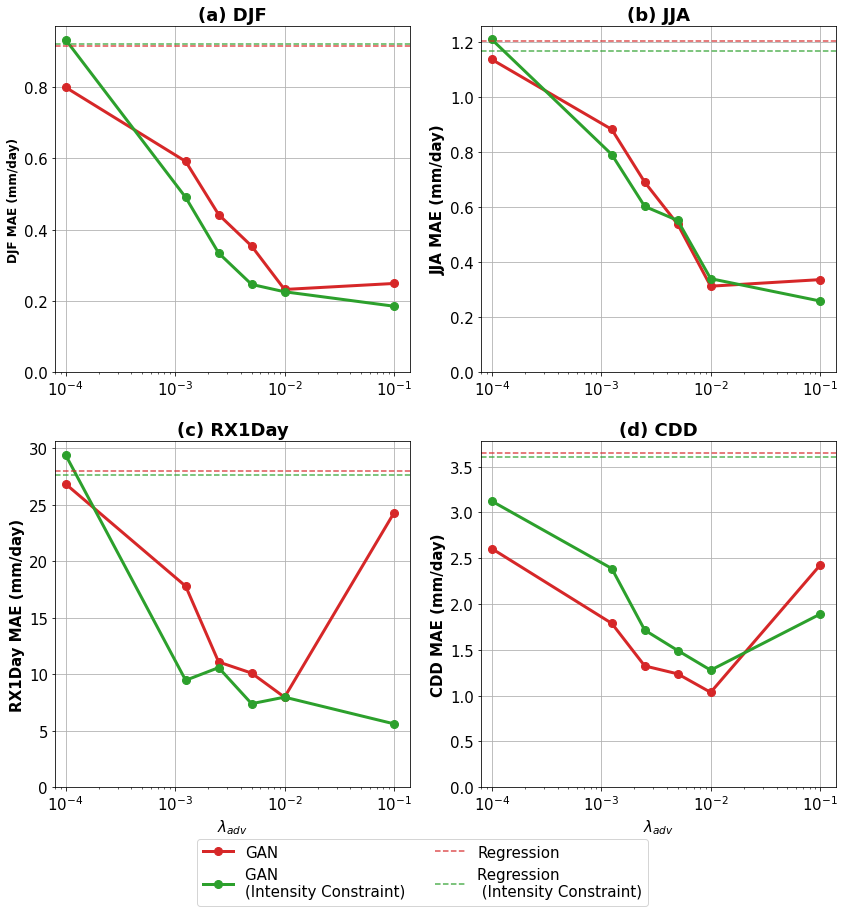

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(14, 14))
ax = ax.ravel()

# Define colors and markers
colors = ['tab:red', 'tab:green', 'tab:blue', 'tab:orange']
markers = ['o', 's', 'x', 'D']
labels = ['GAN', 'GAN \n(Intensity Constraint)', 'Regression', 'Regression \n (Intensity Constraint)']

# Plot data with adjusted colors and markers
for i, (var_lr, var_ic, var_lr_N, var_ic_N) in enumerate([(MAE_lr.DJF_rainfall, MAE_ic.DJF_rainfall, MAE_lr_N.DJF_rainfall, MAE_ic_N.DJF_rainfall), 
                                                           (MAE_lr.JJA_rainfall, MAE_ic.JJA_rainfall, MAE_lr_N.JJA_rainfall, MAE_ic_N.JJA_rainfall), 
                                                           (MAE_lr.rx1day, MAE_ic.rx1day, MAE_lr_N.rx1day, MAE_ic_N.rx1day), 
                                                           (MAE_lr.cdd, MAE_ic.cdd, MAE_lr_N.cdd, MAE_ic_N.cdd)]):
    var_lr.isel(experiment=slice(1, -1)).to_pandas().plot(ax=ax[i], marker=markers[0], color=colors[0], label='GAN', ls='-', ms = 8, lw =3)
    var_ic.isel(experiment=slice(1, -1)).to_pandas().plot(ax=ax[i], marker=markers[0], color=colors[1], label='GAN \n(Intensity Constraint)', ls='-', ms =8, lw =3)

    # var_lr_N.isel(experiment=slice(1, -1)).to_pandas().plot(ax=ax[i], marker=markers[2], color=colors[2], label='NorESM2-MM (LR)', ls='-', alpha=0.6, ms =3)
    # var_ic_N.isel(experiment=slice(1, -1)).to_pandas().plot(ax=ax[i], marker=markers[3], color=colors[3], label='NorESM2-MM (LR IC)', ls='--', alpha=0.6, ms =3)

    ax[i].axhline(var_lr.isel(experiment =0).values, color = colors[0], alpha =0.8,label='GAN',ls ='--')
    ax[i].axhline(var_ic.isel(experiment =0).values, color = colors[1], alpha =0.8,label='GAN \n(Intensity Constraint)', ls ='--')
    # ax[i].scatter(0.11, var_lr_N.isel(experiment =0).values, s =150, color = colors[2], alpha =0.6)
    # ax[i].scatter(0.11, var_ic_N.isel(experiment =0).values, s =150, color = colors[3], alpha =0.6)
# Add other subplots similarly

# Add legend and other configurations
for axis in ax:
    #axis.legend()
    #axis.set_yscale('log')
    axis.set_xscale('log')
    axis.tick_params(labelsize =15)
    axis.set_xlim(8e-5, 0.14)
    axis.set_xlabel(' ')
    axis.set_ylim(0, axis.get_ylim()[-1])
    axis.grid('on')
    
ax[-1].set_xlabel('$\lambda_{adv}$', fontsize=15)
ax[-2].set_xlabel('$\lambda_{adv}$', fontsize=15)
ax[0].set_ylabel('DJF MAE (mm/day)', fontsize =12, weight ='bold')
ax[1].set_ylabel('JJA MAE (mm/day)', fontsize =15, weight ='bold')
ax[2].set_ylabel('RX1Day MAE (mm/day)', fontsize =15, weight ='bold')
ax[3].set_ylabel('CDD MAE (mm/day)', fontsize =15, weight ='bold')
ax[0].set_title('(a) DJF', weight ='bold', fontsize =18)
ax[1].set_title('(b) JJA', weight ='bold', fontsize =18)
ax[2].set_title('(c) RX1Day', weight ='bold', fontsize =18)
ax[3].set_title('(d) CDD', weight ='bold', fontsize =18)
fig.legend(labels=labels, loc='lower center', ncol=2, fontsize =15)
#plt.tight_layout()
fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/training_GAN/figures/overall_results/ec-earth3_eval_final_Figure6.png', dpi =500, bbox_inches ='tight')
plt.show()


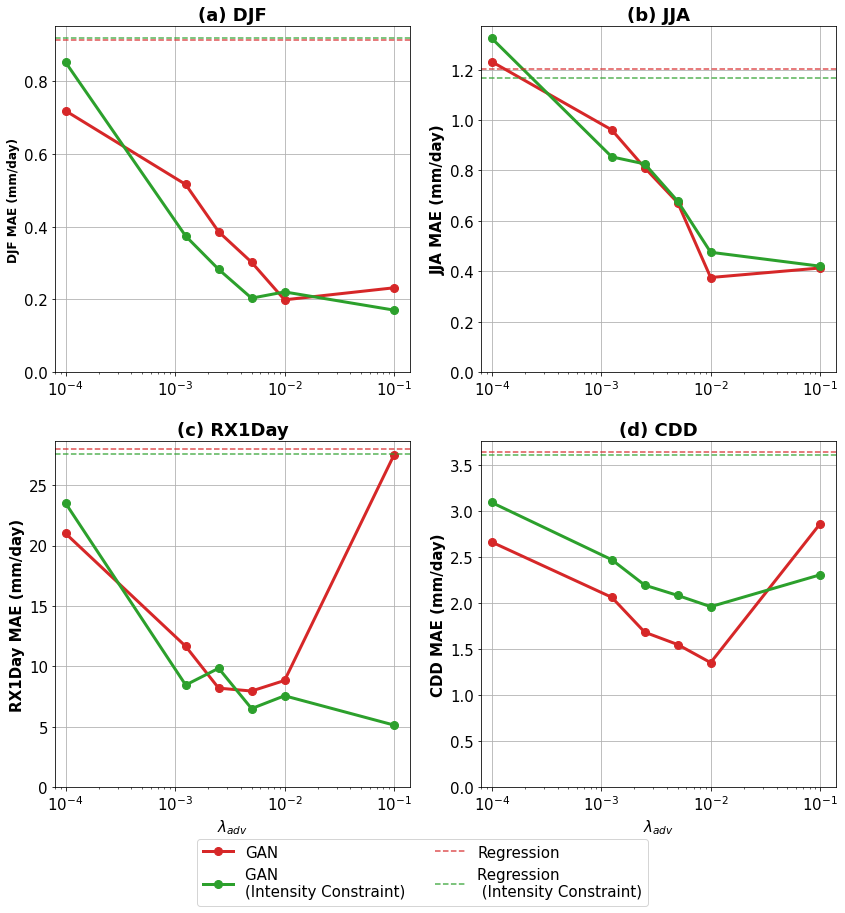

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(14, 14))
ax = ax.ravel()

# Define colors and markers
colors = ['tab:red', 'tab:green', 'tab:blue', 'tab:orange']
markers = ['o', 's', 'x', 'D']
labels = ['GAN', 'GAN \n(Intensity Constraint)', 'Regression', 'Regression \n (Intensity Constraint)']

# Plot data with adjusted colors and markers
for i, (var_lr, var_ic, var_lr_N, var_ic_N) in enumerate([(MAE_lr.DJF_rainfall, MAE_ic.DJF_rainfall, MAE_lr_N.DJF_rainfall, MAE_ic_N.DJF_rainfall), 
                                                           (MAE_lr.JJA_rainfall, MAE_ic.JJA_rainfall, MAE_lr_N.JJA_rainfall, MAE_ic_N.JJA_rainfall), 
                                                           (MAE_lr.rx1day, MAE_ic.rx1day, MAE_lr_N.rx1day, MAE_ic_N.rx1day), 
                                                           (MAE_lr.cdd, MAE_ic.cdd, MAE_lr_N.cdd, MAE_ic_N.cdd)]):
    var_lr_N.isel(experiment=slice(1, -1)).to_pandas().plot(ax=ax[i], marker=markers[0], color=colors[0], label='GAN', ls='-', ms = 8, lw =3)
    var_ic_N.isel(experiment=slice(1, -1)).to_pandas().plot(ax=ax[i], marker=markers[0], color=colors[1], label='GAN \n(Intensity Constraint)', ls='-', ms =8, lw =3)

    ax[i].axhline(var_lr.isel(experiment =0).values, color = colors[0], alpha =0.8,label='GAN',ls ='--')
    ax[i].axhline(var_ic.isel(experiment =0).values, color = colors[1], alpha =0.8,label='GAN \n(Intensity Constraint)', ls ='--')
    # ax[i].scatter(0.11, var_lr_N.isel(experiment =0).values, s =150, color = colors[2], alpha =0.6)
    # ax[i].scatter(0.11, var_ic_N.isel(experiment =0).values, s =150, color = colors[3], alpha =0.6)
# Add other subplots similarly

# Add legend and other configurations
for axis in ax:
    #axis.legend()
    #axis.set_yscale('log')
    axis.set_xscale('log')
    axis.tick_params(labelsize =15)
    axis.set_xlim(8e-5, 0.14)
    axis.set_xlabel(' ')
    axis.set_ylim(0, axis.get_ylim()[-1])
    axis.grid('on')
    
ax[-1].set_xlabel('$\lambda_{adv}$', fontsize=15)
ax[-2].set_xlabel('$\lambda_{adv}$', fontsize=15)
ax[0].set_ylabel('DJF MAE (mm/day)', fontsize =12, weight ='bold')
ax[1].set_ylabel('JJA MAE (mm/day)', fontsize =15, weight ='bold')
ax[2].set_ylabel('RX1Day MAE (mm/day)', fontsize =15, weight ='bold')
ax[3].set_ylabel('CDD MAE (mm/day)', fontsize =15, weight ='bold')
ax[0].set_title('(a) DJF', weight ='bold', fontsize =18)
ax[1].set_title('(b) JJA', weight ='bold', fontsize =18)
ax[2].set_title('(c) RX1Day', weight ='bold', fontsize =18)
ax[3].set_title('(d) CDD', weight ='bold', fontsize =18)
fig.legend(labels=labels, loc='lower center', ncol=2, fontsize =15)
#plt.tight_layout()
fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/training_GAN/figures/overall_results/NorESM2-MM_eval_final_Figure6_S1.png', dpi =500, bbox_inches ='tight')
plt.show()


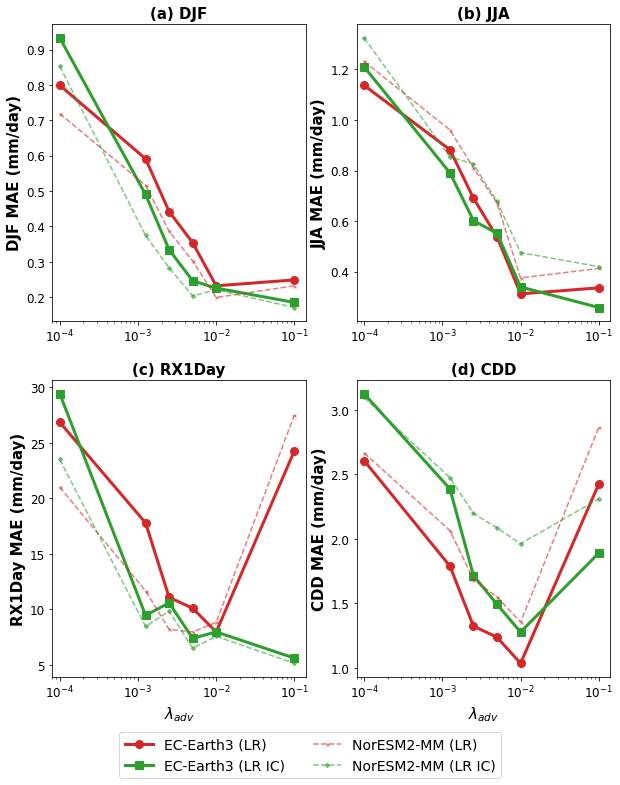

In [98]:
fig, ax = plt.subplots(2, 2, figsize=(10, 12))
ax = ax.ravel()

# Define colors and markers
colors = ['tab:red', 'tab:green', 'tab:blue', 'tab:orange']
markers = ['o', 's', 'x', 'D']
labels = ['EC-Earth3 (LR)', 'EC-Earth3 (LR IC)', 'NorESM2-MM (LR)', 'NorESM2-MM (LR IC)']

# Plot data with adjusted colors and markers
for i, (var_lr, var_ic, var_lr_N, var_ic_N) in enumerate([(MAE_lr.DJF_rainfall, MAE_ic.DJF_rainfall, MAE_lr_N.DJF_rainfall, MAE_ic_N.DJF_rainfall), 
                                                           (MAE_lr.JJA_rainfall, MAE_ic.JJA_rainfall, MAE_lr_N.JJA_rainfall, MAE_ic_N.JJA_rainfall), 
                                                           (MAE_lr.rx1day, MAE_ic.rx1day, MAE_lr_N.rx1day, MAE_ic_N.rx1day), 
                                                           (MAE_lr.cdd, MAE_ic.cdd, MAE_lr_N.cdd, MAE_ic_N.cdd)]):
    var_lr.isel(experiment=slice(1, -1)).to_pandas().plot(ax=ax[i], marker=markers[0], color=colors[0], label='EC-Earth3 (LR)', ls='-', ms = 8, lw =3)
    var_ic.isel(experiment=slice(1, -1)).to_pandas().plot(ax=ax[i], marker=markers[1], color=colors[1], label='EC-Earth3 (LR IC)', ls='-', ms =8, lw =3)

    var_lr_N.isel(experiment=slice(1, -1)).to_pandas().plot(ax=ax[i], marker=markers[2], color=colors[0], label='NorESM2-MM (LR)', ls='--', alpha=0.6, ms =3)
    var_ic_N.isel(experiment=slice(1, -1)).to_pandas().plot(ax=ax[i], marker=markers[3], color=colors[1], label='NorESM2-MM (LR IC)', ls='--', alpha=0.6, ms =3)

    #ax[i].scatter(0.11, var_lr.isel(experiment =0).values, s =150, color = colors[0], alpha =0.8)
    #ax[i].scatter(0.11, var_ic.isel(experiment =0).values, s =150, color = colors[1], alpha =0.8)
    #ax[i].scatter(0.11, var_lr_N.isel(experiment =0).values, s =150, color = colors[0], alpha =0.6)
    #ax[i].scatter(0.11, var_ic_N.isel(experiment =0).values, s =150, color = colors[1], alpha =0.6)
# Add other subplots similarly

# Add legend and other configurations
for axis in ax:
    #axis.legend()
    #axis.set_yscale('log')
    axis.set_xscale('log')
    axis.tick_params(labelsize =12)
    axis.set_xlim(8e-5, 0.14)
    axis.set_xlabel(' ')
    
ax[-1].set_xlabel('$\lambda_{adv}$', fontsize=15)
ax[-2].set_xlabel('$\lambda_{adv}$', fontsize=15)
ax[0].set_ylabel('DJF MAE (mm/day)', fontsize =15, weight ='bold')
ax[1].set_ylabel('JJA MAE (mm/day)', fontsize =15, weight ='bold')
ax[2].set_ylabel('RX1Day MAE (mm/day)', fontsize =15, weight ='bold')
ax[3].set_ylabel('CDD MAE (mm/day)', fontsize =15, weight ='bold')
ax[0].set_title('(a) DJF', weight ='bold', fontsize =15)
ax[1].set_title('(b) JJA', weight ='bold', fontsize =15)
ax[2].set_title('(c) RX1Day', weight ='bold', fontsize =15)
ax[3].set_title('(d) CDD', weight ='bold', fontsize =15)
fig.legend(labels=labels, loc='lower center', ncol=2, fontsize =14)
fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/training_GAN/figures/overall_results/ec-earth3_noresm2-mm_eval.png', dpi =500, bbox_inches ='tight')
#plt.tight_layout()
plt.show()


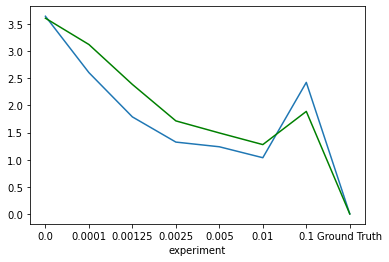

In [27]:
MAE_lr.to_pandas().cdd.plot()
MAE_ic.to_pandas().cdd.plot(color ='g')#.plot()

In [ ]:
RMSE_rx1_single = abs(metrics.mean("year") - metrics.sel(experiment='Ground Truth').mean("year")).mean(["lat","lon"])
pcor_signle_djf= xr.corr(metrics['DJF_rainfall'].stack(z =['lat','lon']),
              metrics.sel(experiment='Ground Truth')['DJF_rainfall'].stack(z =['lat','lon']), dim ="z")
pcor_signle_JJA= xr.corr(metrics['JJA_rainfall'].stack(z =['lat','lon']),
              metrics.sel(experiment='Ground Truth')['JJA_rainfall'].stack(z =['lat','lon']), dim ="z")
RMSE_rx1_single_bias = (metrics.mean("year") - metrics.sel(experiment='Ground Truth').mean("year")).mean(["lat","lon"])

fig, ax = plt.subplots(3, figsize = (7,11), sharex = True)
RMSE_rx1_single.DJF_rainfall.isel(experiment = slice(None, -1)).to_pandas().plot(ax = ax[0], marker ='o', color='blue', label ='DJF Precipitation',ls ='-')
ax[0].axhline(RMSE_rx1_single.DJF_rainfall.isel(experiment =0).values, color ='blue', label ='Regression Baseline' ,ls ='--', alpha =0.8)
RMSE_rx1_single.JJA_rainfall.isel(experiment = slice(None, -1)).to_pandas().plot(ax = ax[0], marker ='o', color ='green', label ='JJA Precipitation', ls ='-')
ax[0].axhline(RMSE_rx1_single.JJA_rainfall.isel(experiment =0).values, color ='green', label ='Regression Baseline',ls ='--', alpha =0.8)
RMSE_rx1_single.cdd.isel(experiment = slice(None, -1)).to_pandas().plot(ax = ax[2], marker ='o', ls ='-', color ='brown', label ='CDD')
RMSE_rx1_single.rx1day.isel(experiment = slice(None, -1)).to_pandas().plot(ax = ax[1], marker ='o', ls ='-', color ='k', label ='RX1Day')
ax[1].axhline(RMSE_rx1_single.rx1day.isel(experiment =0).values, color ='k', label ='Regression Baseline',ls ='--', alpha =0.8)
ax[2].axhline(RMSE_rx1_single.cdd.isel(experiment =0).values, color ='brown', label ='Regression Baseline',ls ='--', alpha =0.8)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[0].grid('on')
ax[1].grid('on')
ax[2].grid('on')
ax[-1].set_xlabel('$\lambda_{adv}$', weight ='bold', fontsize =15)
ax[-1].set_ylabel('CDD MAE (days)', weight ='bold', fontsize =12)
ax[-2].set_ylabel('RX1Day \nMAE (mm)', weight ='bold', fontsize =12)
ax[-3].set_ylabel('Seasonal \n Precipitation MAE (mm/day)', weight ='bold', fontsize =12)
ax[0].set_title('(a)', weight ='bold', fontsize =15)
ax[1].set_title('(b)', weight ='bold', fontsize =15)
ax[2].set_title('(c)', weight ='bold', fontsize =15)
ax[0].legend()
ax[1].legend()
ax[2].legend()
fig.savefig(f'/nesi/project/niwa00018/ML_downscaling_CCAM/training_GAN/figures/performance_evaluation_{model}_{framework}.png', dpi =500, bbox_inches ='tight')

In [83]:
variance_ratio = dsets.isel(member =0).var("time")
variance_ratio_truth = y.sel(time = dsets.time).var("time")
ratio = variance_ratio/variance_ratio_truth
fig, ax = plt.subplots(1, 7, subplot_kw = dict(projection = ccrs.PlateCarree(central_longitude=171.77)), figsize = (12, 3))
ax = ax.ravel()
for i, lambdas in enumerate(ratio.experiment.values):   
    cs = (ratio.sel(experiment = lambdas).pr*100).sel(lat = slice(-55, -33.6), lon =slice(165.25, 182)).plot( vmax =200, cmap ='PuOr', vmin =0, ax = ax[i], transform = ccrs.PlateCarree(), add_colorbar =False)
    ax[i].coastlines('10m')
    ax[i].set_title('$\lambda_{adv}$' + f'={lambdas}', fontsize =12)
    ax4 = fig.add_axes([0.1, 0.05, 0.8, 0.05])
    cbar = fig.colorbar(cs, cax = ax4, orientation ='horizontal')
    cbar.set_label('Variance Ratio', fontsize =12, weight ='bold')
fig.savefig(f'/nesi/project/niwa00018/ML_downscaling_CCAM/training_GAN/figures/{output_model_name}/Variance_Ratio_plot.png', dpi =500, bbox_inches ='tight')

In [ ]:
def metrics_eval_plot